In [89]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from catboost import CatBoostRegressor, Pool
import shap


In [32]:
dataHCC1 = pd.read_csv("EDAdataHCC.csv")
dataHCC1

,Unnamed: 0,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,...,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,Class
0,0,1,0.0,1,0.0,0.0,0.0,1,1.0,0.0,...,2.1,34.0,41,183.0,150.0,7.1,0.70,1.0,3.5,1
1,2,1,0.0,1,1.0,1.0,0.0,1,0.0,0.0,...,0.4,58.0,68,202.0,109.0,7.0,2.10,5.0,13.0,1
2,3,1,1.0,1,0.0,0.0,0.0,1,1.0,0.0,...,0.4,16.0,64,94.0,174.0,8.1,1.11,2.0,15.7,0
3,4,1,1.0,1,1.0,1.0,0.0,1,0.0,0.0,...,0.7,147.0,306,173.0,109.0,6.9,1.80,1.0,9.0,1
4,5,1,0.0,1,0.0,0.0,0.0,1,0.0,1.0,...,3.5,91.0,122,242.0,396.0,5.6,0.90,1.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,160,0,0.0,1,0.0,0.0,1.0,1,0.0,0.0,...,0.5,35.0,40,449.0,109.0,7.6,0.70,5.0,3.0,1
152,161,0,1.0,0,0.0,0.0,0.0,1,0.0,0.0,...,3.6,50.0,91,147.0,280.0,6.7,0.70,1.0,2.2,0
153,162,1,0.0,1,0.0,0.0,0.0,1,1.0,1.0,...,0.6,53.0,52,164.0,181.0,7.5,1.46,5.0,18.6,1
154,163,1,0.0,1,1.0,1.0,1.0,1,0.0,0.0,...,1.1,50.0,60,320.0,170.0,8.4,0.74,5.0,18.0,0


In [35]:
dataHCC2 = dataHCC1.drop("Unnamed: 0", axis = 1)
dataHCC2

,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,13.Hem,...,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,Class
0,1,0.0,1,0.0,0.0,0.0,1,1.0,0.0,1.0,...,2.1,34.0,41,183.0,150.0,7.1,0.70,1.0,3.5,1
1,1,0.0,1,1.0,1.0,0.0,1,0.0,0.0,0.0,...,0.4,58.0,68,202.0,109.0,7.0,2.10,5.0,13.0,1
2,1,1.0,1,0.0,0.0,0.0,1,1.0,0.0,0.0,...,0.4,16.0,64,94.0,174.0,8.1,1.11,2.0,15.7,0
3,1,1.0,1,1.0,1.0,0.0,1,0.0,0.0,0.0,...,0.7,147.0,306,173.0,109.0,6.9,1.80,1.0,9.0,1
4,1,0.0,1,0.0,0.0,0.0,1,0.0,1.0,0.0,...,3.5,91.0,122,242.0,396.0,5.6,0.90,1.0,10.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,0,0.0,1,0.0,0.0,1.0,1,0.0,0.0,0.0,...,0.5,35.0,40,449.0,109.0,7.6,0.70,5.0,3.0,1
152,0,1.0,0,0.0,0.0,0.0,1,0.0,0.0,0.0,...,3.6,50.0,91,147.0,280.0,6.7,0.70,1.0,2.2,0
153,1,0.0,1,0.0,0.0,0.0,1,1.0,1.0,0.0,...,0.6,53.0,52,164.0,181.0,7.5,1.46,5.0,18.6,1
154,1,0.0,1,1.0,1.0,1.0,1,0.0,0.0,0.0,...,1.1,50.0,60,320.0,170.0,8.4,0.74,5.0,18.0,0


In [36]:
dataHCC2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1.Gen          156 non-null    int64  
 1   2.Sym          156 non-null    float64
 2   3.Alc          156 non-null    int64  
 3   4.HepB         156 non-null    float64
 4   6.HepB         156 non-null    float64
 5   7.HepC         156 non-null    float64
 6   8.Cir          156 non-null    int64  
 7   11.Dia         156 non-null    float64
 8   12.Obe         156 non-null    float64
 9   13.Hem         156 non-null    float64
 10  14.Art         156 non-null    float64
 11  15.CRen        156 non-null    float64
 12  16.HIV         156 non-null    float64
 13  17.Non         156 non-null    float64
 14  19.Spl         156 non-null    float64
 15  20.PHyp        156 non-null    float64
 16  21.Thr         156 non-null    float64
 17  22.LMet        156 non-null    float64
 18  23.Rad    

In [60]:
df = dataHCC2.iloc[:0,:]
df

,1.Gen,2.Sym,3.Alc,4.HepB,6.HepB,7.HepC,8.Cir,11.Dia,12.Obe,13.Hem,...,37.Bil,38.Ala,39.Aspa,40.Gam,41.Alk,42.Prot,43.Crea,44.NNod,45.dnod,Class


# Feature importance

Feature: 0, Score: 0.01250
Feature: 1, Score: 0.00481
Feature: 2, Score: 0.01460
Feature: 3, Score: 0.00272
Feature: 4, Score: 0.00477
Feature: 5, Score: 0.00283
Feature: 6, Score: 0.00406
Feature: 7, Score: 0.00257
Feature: 8, Score: 0.00117
Feature: 9, Score: 0.00448
Feature: 10, Score: 0.00338
Feature: 11, Score: 0.00043
Feature: 12, Score: 0.00198
Feature: 13, Score: 0.00398
Feature: 14, Score: 0.00559
Feature: 15, Score: 0.01304
Feature: 16, Score: 0.01103
Feature: 17, Score: 0.00372
Feature: 18, Score: 0.05040
Feature: 19, Score: 0.03621
Feature: 20, Score: 0.00707
Feature: 21, Score: 0.02238
Feature: 22, Score: 0.04221
Feature: 23, Score: 0.09570
Feature: 24, Score: 0.08588
Feature: 25, Score: 0.03659
Feature: 26, Score: 0.03476
Feature: 27, Score: 0.04207
Feature: 28, Score: 0.06410
Feature: 29, Score: 0.04426
Feature: 30, Score: 0.03356
Feature: 31, Score: 0.05984
Feature: 32, Score: 0.04768
Feature: 33, Score: 0.08598
Feature: 34, Score: 0.03373
Feature: 35, Score: 0.03269
Fe

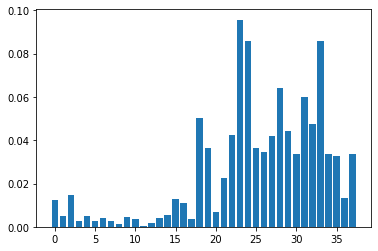

In [37]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X = dataHCC2.iloc[:,1:39]
y = dataHCC2["Class"]
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Naive Bayes classifier 

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
  

In [74]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)*100

69.84126984126983

In [75]:
imps = permutation_importance(gnb, X_test, y_test)
print(imps.importances_mean)

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.06031746
  0.          0.          0.          0.          0.          0.03174603
 -0.01904762  0.0031746   0.0031746  -0.01587302  0.          0.
  0.          0.        ]


In [72]:
# making predictions on the testing set
y_pred = gnb.predict(X_test)

In [73]:
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 69.84126984126983


# K-fold cross validation 

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [43]:
score_rf=cross_val_score(RandomForestClassifier(n_estimators=40),X, y,cv=10)
print(score_rf)
print("Avg :",np.average(score_rf))

[0.8125     0.9375     0.75       0.75       0.75       0.6875
 0.86666667 0.73333333 0.73333333 0.6       ]
Avg : 0.7620833333333332


In [44]:
scores1 = cross_val_score(RandomForestClassifier(n_estimators=5),X, y, cv=10)
print("Avg Score for Estimators=5 and CV=10 :",np.average(scores1))

Avg Score for Estimators=5 and CV=10 : 0.6595833333333332


In [45]:
scores2 = cross_val_score(RandomForestClassifier(n_estimators=20),X, y, cv=10)
print("Avg Score for Estimators=20 and CV=10 :",np.average(scores2))

Avg Score for Estimators=20 and CV=10 : 0.7237500000000001


In [46]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30),X, y, cv=10)
print("Avg Score for Estimators=30 and CV=10 :",np.average(scores3))

Avg Score for Estimators=30 and CV=10 : 0.7483333333333333


In [47]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40),X, y, cv=10)
print("Avg Score for Estimators=40 and CV=10 :",np.average(scores4))

Avg Score for Estimators=40 and CV=10 : 0.6849999999999999


# catboost

In [65]:
import catboost as ctb
from catboost import CatBoostClassifier



In [66]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]


In [68]:
cnb = ctb.CatBoostClassifier()
cnb.fit(X_train, y_train)
print(cnb)

Learning rate set to 0.003737
0:	learn: 0.6911437	total: 2.61ms	remaining: 2.61s
1:	learn: 0.6889021	total: 4.75ms	remaining: 2.37s
2:	learn: 0.6872359	total: 6.52ms	remaining: 2.17s
3:	learn: 0.6851560	total: 7.93ms	remaining: 1.98s
4:	learn: 0.6834632	total: 9.26ms	remaining: 1.84s
5:	learn: 0.6813164	total: 10.6ms	remaining: 1.75s
6:	learn: 0.6792529	total: 12ms	remaining: 1.7s
7:	learn: 0.6773111	total: 13.6ms	remaining: 1.68s
8:	learn: 0.6751222	total: 14.9ms	remaining: 1.64s
9:	learn: 0.6731758	total: 16.8ms	remaining: 1.66s
10:	learn: 0.6705342	total: 18.4ms	remaining: 1.66s
11:	learn: 0.6684076	total: 20.1ms	remaining: 1.66s
12:	learn: 0.6669285	total: 21.6ms	remaining: 1.64s
13:	learn: 0.6643732	total: 22.9ms	remaining: 1.61s
14:	learn: 0.6629653	total: 24.3ms	remaining: 1.59s
15:	learn: 0.6608036	total: 25.8ms	remaining: 1.58s
16:	learn: 0.6584564	total: 27.3ms	remaining: 1.58s
17:	learn: 0.6560829	total: 29ms	remaining: 1.58s
18:	learn: 0.6537247	total: 30.5ms	remaining: 1.5

276:	learn: 0.3521071	total: 391ms	remaining: 1.02s
277:	learn: 0.3512680	total: 393ms	remaining: 1.02s
278:	learn: 0.3504412	total: 394ms	remaining: 1.02s
279:	learn: 0.3496071	total: 396ms	remaining: 1.02s
280:	learn: 0.3493038	total: 396ms	remaining: 1.01s
281:	learn: 0.3486563	total: 398ms	remaining: 1.01s
282:	learn: 0.3477728	total: 399ms	remaining: 1.01s
283:	learn: 0.3470455	total: 401ms	remaining: 1.01s
284:	learn: 0.3464274	total: 402ms	remaining: 1.01s
285:	learn: 0.3458676	total: 404ms	remaining: 1.01s
286:	learn: 0.3450448	total: 406ms	remaining: 1.01s
287:	learn: 0.3443629	total: 407ms	remaining: 1.01s
288:	learn: 0.3438904	total: 409ms	remaining: 1s
289:	learn: 0.3430019	total: 410ms	remaining: 1s
290:	learn: 0.3421003	total: 412ms	remaining: 1s
291:	learn: 0.3414195	total: 413ms	remaining: 1s
292:	learn: 0.3408709	total: 414ms	remaining: 1000ms
293:	learn: 0.3400242	total: 416ms	remaining: 998ms
294:	learn: 0.3394286	total: 417ms	remaining: 996ms
295:	learn: 0.3387273	t

558:	learn: 0.2137645	total: 772ms	remaining: 609ms
559:	learn: 0.2134579	total: 774ms	remaining: 608ms
560:	learn: 0.2130155	total: 775ms	remaining: 607ms
561:	learn: 0.2126948	total: 777ms	remaining: 606ms
562:	learn: 0.2123215	total: 778ms	remaining: 604ms
563:	learn: 0.2119742	total: 780ms	remaining: 603ms
564:	learn: 0.2117395	total: 781ms	remaining: 602ms
565:	learn: 0.2113714	total: 783ms	remaining: 600ms
566:	learn: 0.2109407	total: 784ms	remaining: 599ms
567:	learn: 0.2106312	total: 786ms	remaining: 598ms
568:	learn: 0.2104509	total: 788ms	remaining: 597ms
569:	learn: 0.2102623	total: 789ms	remaining: 595ms
570:	learn: 0.2100074	total: 790ms	remaining: 594ms
571:	learn: 0.2097059	total: 792ms	remaining: 592ms
572:	learn: 0.2094656	total: 793ms	remaining: 591ms
573:	learn: 0.2091808	total: 794ms	remaining: 589ms
574:	learn: 0.2089835	total: 796ms	remaining: 588ms
575:	learn: 0.2086980	total: 797ms	remaining: 587ms
576:	learn: 0.2084085	total: 798ms	remaining: 585ms
577:	learn: 

834:	learn: 0.1435794	total: 1.16s	remaining: 229ms
835:	learn: 0.1433710	total: 1.16s	remaining: 228ms
836:	learn: 0.1431860	total: 1.16s	remaining: 227ms
837:	learn: 0.1429232	total: 1.17s	remaining: 225ms
838:	learn: 0.1427214	total: 1.17s	remaining: 224ms
839:	learn: 0.1424919	total: 1.17s	remaining: 223ms
840:	learn: 0.1423732	total: 1.17s	remaining: 221ms
841:	learn: 0.1421692	total: 1.17s	remaining: 220ms
842:	learn: 0.1418658	total: 1.17s	remaining: 219ms
843:	learn: 0.1416609	total: 1.18s	remaining: 217ms
844:	learn: 0.1415726	total: 1.18s	remaining: 216ms
845:	learn: 0.1413810	total: 1.18s	remaining: 215ms
846:	learn: 0.1412097	total: 1.18s	remaining: 213ms
847:	learn: 0.1410235	total: 1.18s	remaining: 212ms
848:	learn: 0.1408600	total: 1.18s	remaining: 210ms
849:	learn: 0.1407162	total: 1.18s	remaining: 209ms
850:	learn: 0.1405911	total: 1.19s	remaining: 208ms
851:	learn: 0.1403525	total: 1.19s	remaining: 206ms
852:	learn: 0.1402136	total: 1.19s	remaining: 205ms
853:	learn: 

In [69]:
expected_y  = y_test
predicted_y = cnb.predict(X_test)

In [70]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.52      0.57      0.55        21
           1       0.78      0.74      0.76        42

    accuracy                           0.68        63
   macro avg       0.65      0.65      0.65        63
weighted avg       0.69      0.68      0.69        63

[[12  9]
 [11 31]]


In [76]:
categorical_features = X_train.select_dtypes(exclude=[np.number])

Text(0.5, 1.0, 'Feature Importance')

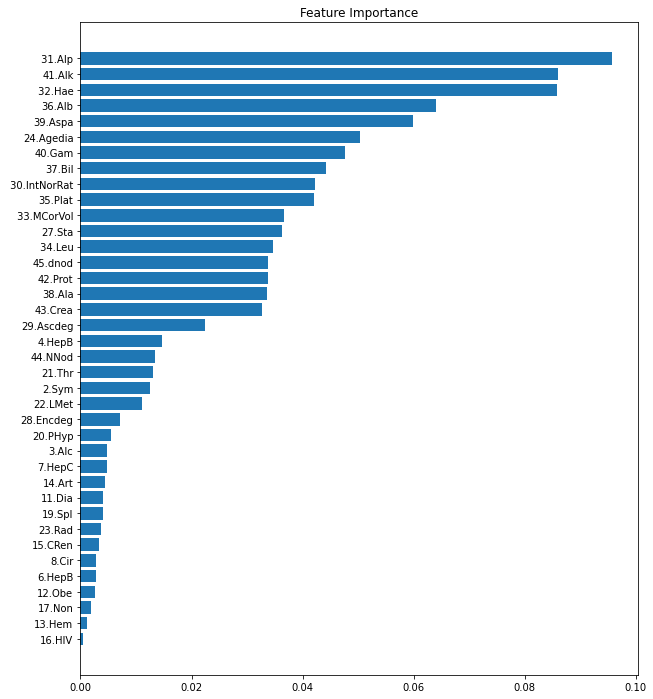

In [86]:

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


Text(0.5, 1.0, 'Permutation Importance')

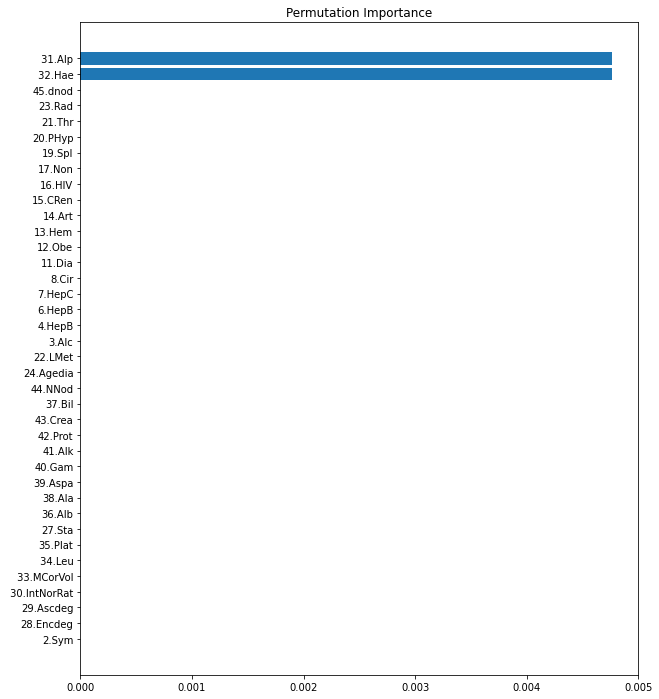

In [88]:

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(10, 12))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Permutation Importance')
